# Sequence to Sequence Models

Translate sentence portuguese -> english

## Basic Models

1. Enconder network rnn/lstm/gru fed 1 word at a time -> output vector representing the input sentence
2. Decoder network that takes the output of the enconder, and outputs the translation one word at a time.

This works for image captioning: use an alex-net to get the enconding and feed it to an rnn to generate caption of the image.


## Machine translation as Conditional language model


Instead of starting with zeros (as in standard language models), the decoder is initialized with the encoder's output — the encoded representation of the source sentence.
It models P(y^1,y^2, ...y^ty | x^1,...,x^2)

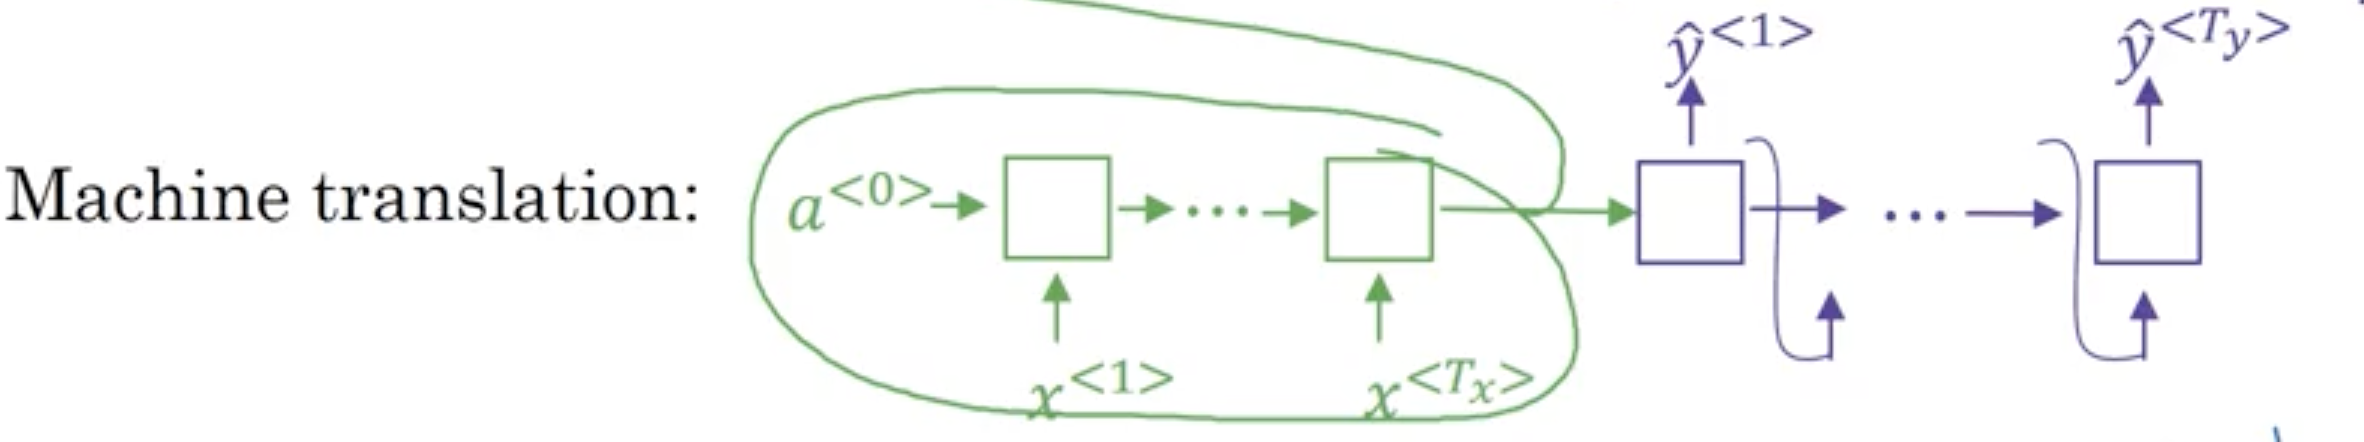

### We dont want to sample randomly from the distributiom, but find the sequence y that maximizes the probability of being the correct translation

- We dont use greed search, i.eg, first picking the most likely first word, then the best second word for the second position, etc
- Greedy search picks the most likely word at each step, but that doesn't guarantee the best overall translation.
- We want to maximize the joint probability of the full sequence, not just the best word at each timestep.
- We also cant try exhaustively all combinations, because its too expensive.
- We use an approximate/heuristic search algorithm **Beam**


### Beam search

1. We use the encoder-decoder model to compute the probability distribution over the first word of the translation. Then, we keep track of the top-k most likely first words.

E.g., (in, jane, september)

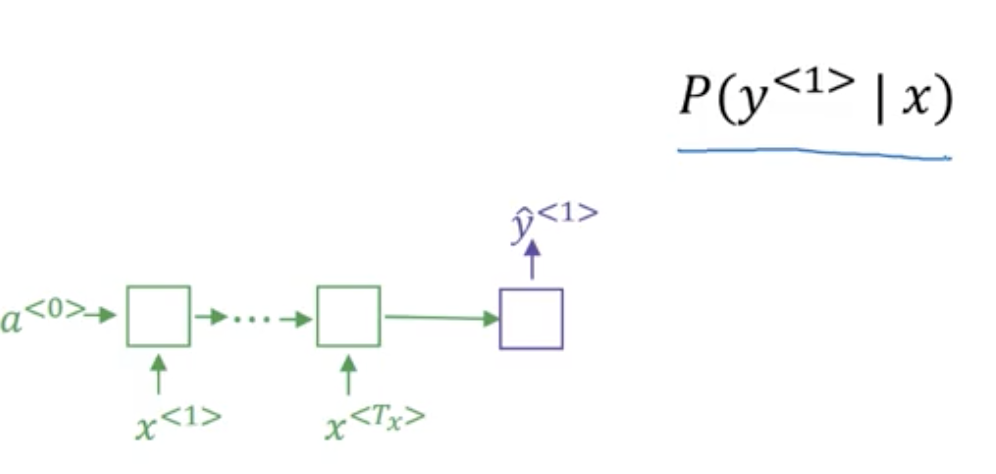

2. For each of the k candidate prefixes, we expand them one step further by feeding them back into the decoder (along with the encoder's output).

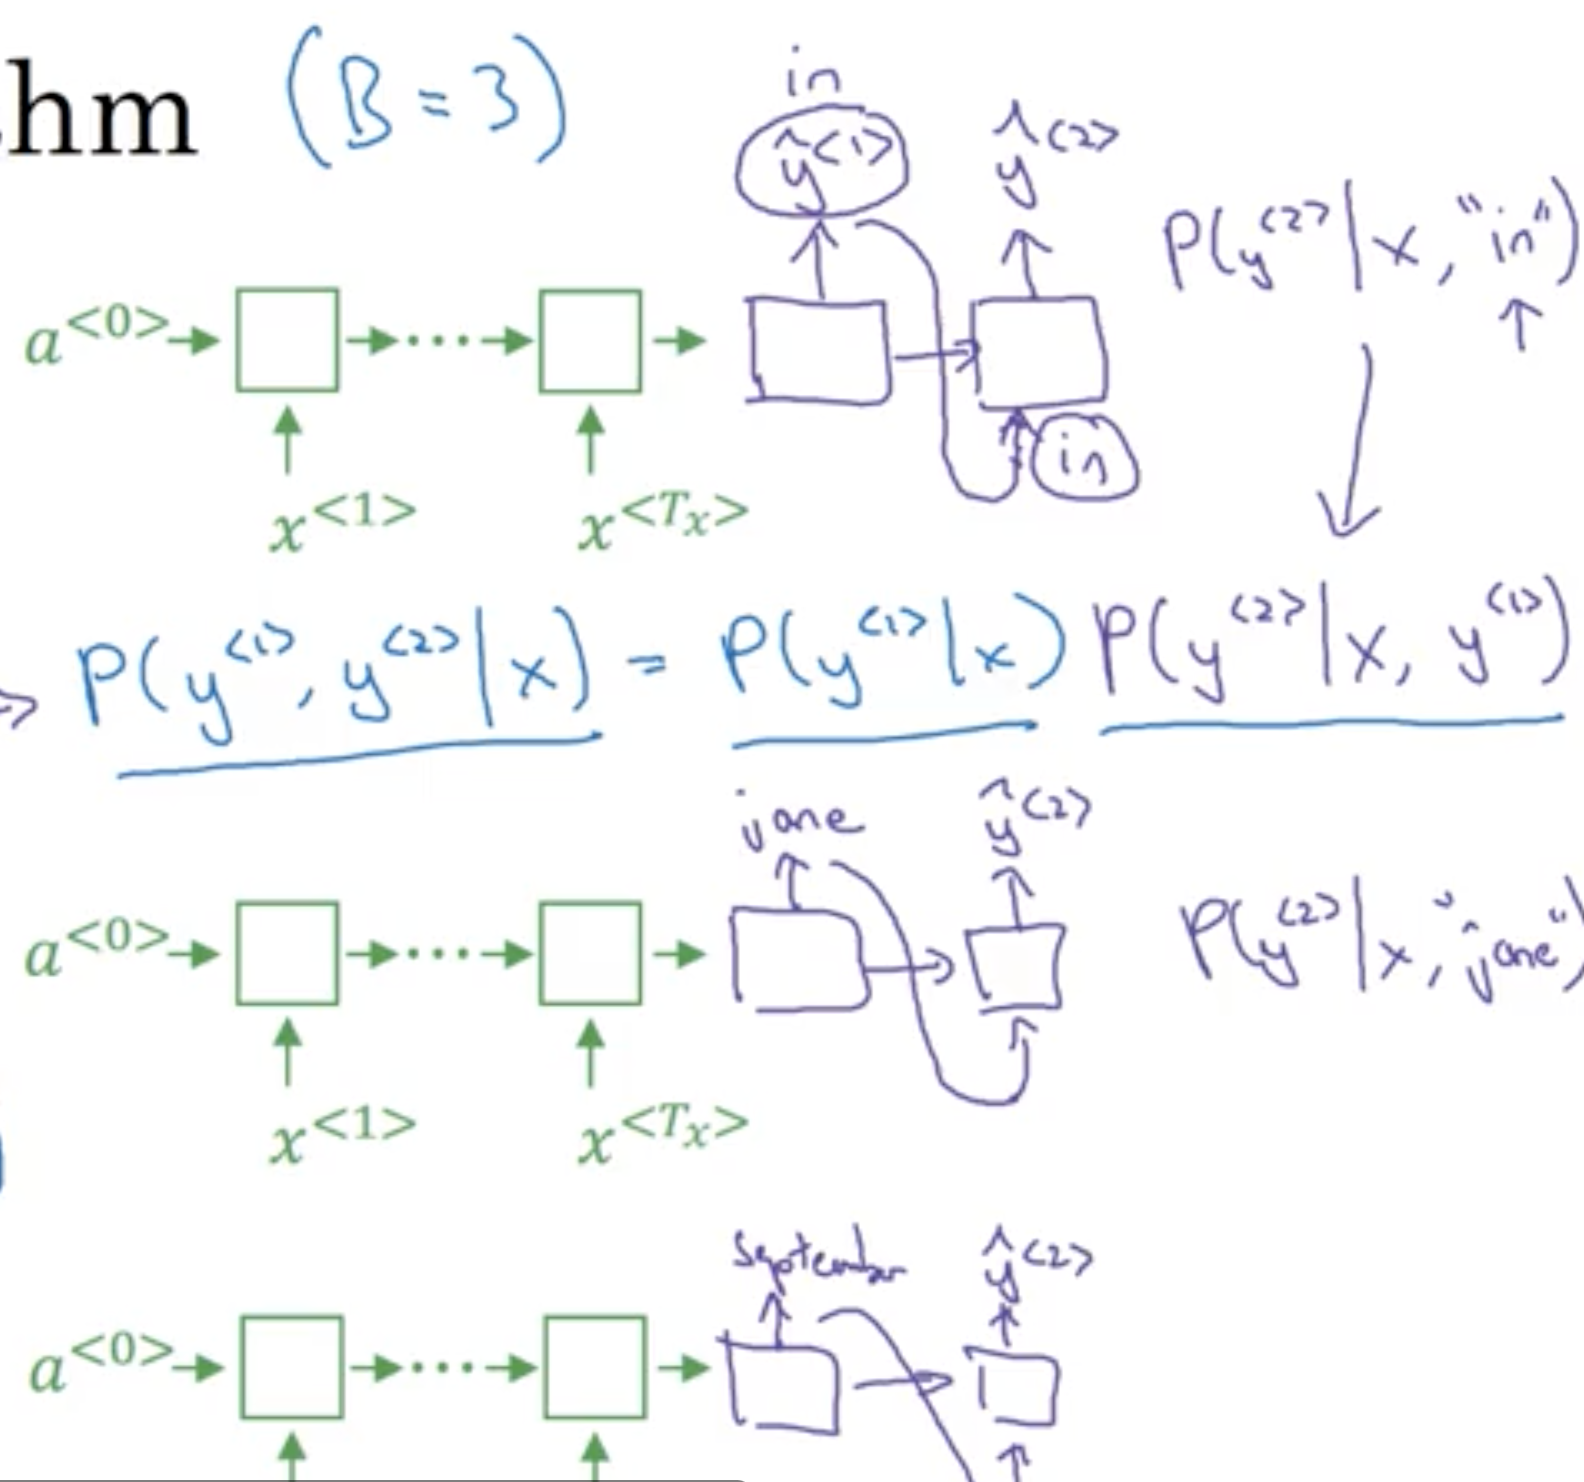

We compute the probability of the partial translation until the timepoint and pick again the top-k.

E.g., ("in september", "jave is", "jane visits") -> september is no longer option for first word

This continues until all beams produce an end-of-sequence token or reach a max length.

- We use k copies of the network.
- large b, better results but slower

Length normalization 

- instead of maximizing the product of the conditional probabilities of each step, we maximize the sum of the logs, that gives the same result.
- original tends to prefer shorter sentences because multiplies less probabilities, maximizing the product

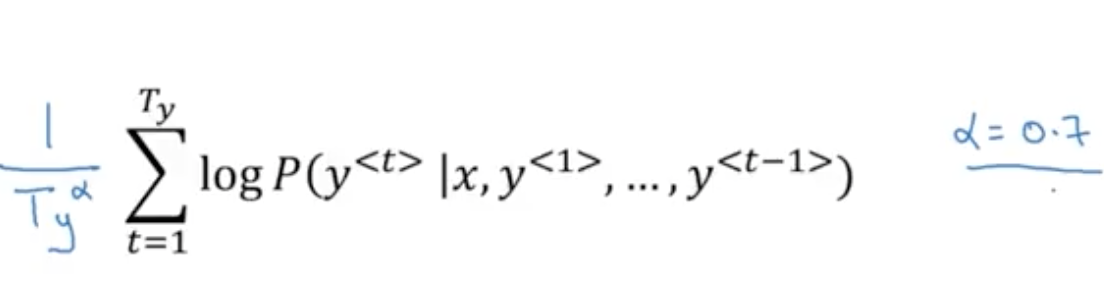


#### Error analysis to understand if the problem is the beam search or the rrn model

- We use a ground truth translation and the predicted translation and check on the model witch one it attributes higher probability.
- If (P(y|x)) > P(^y,x) , the model is correct but beam search choose poorly.

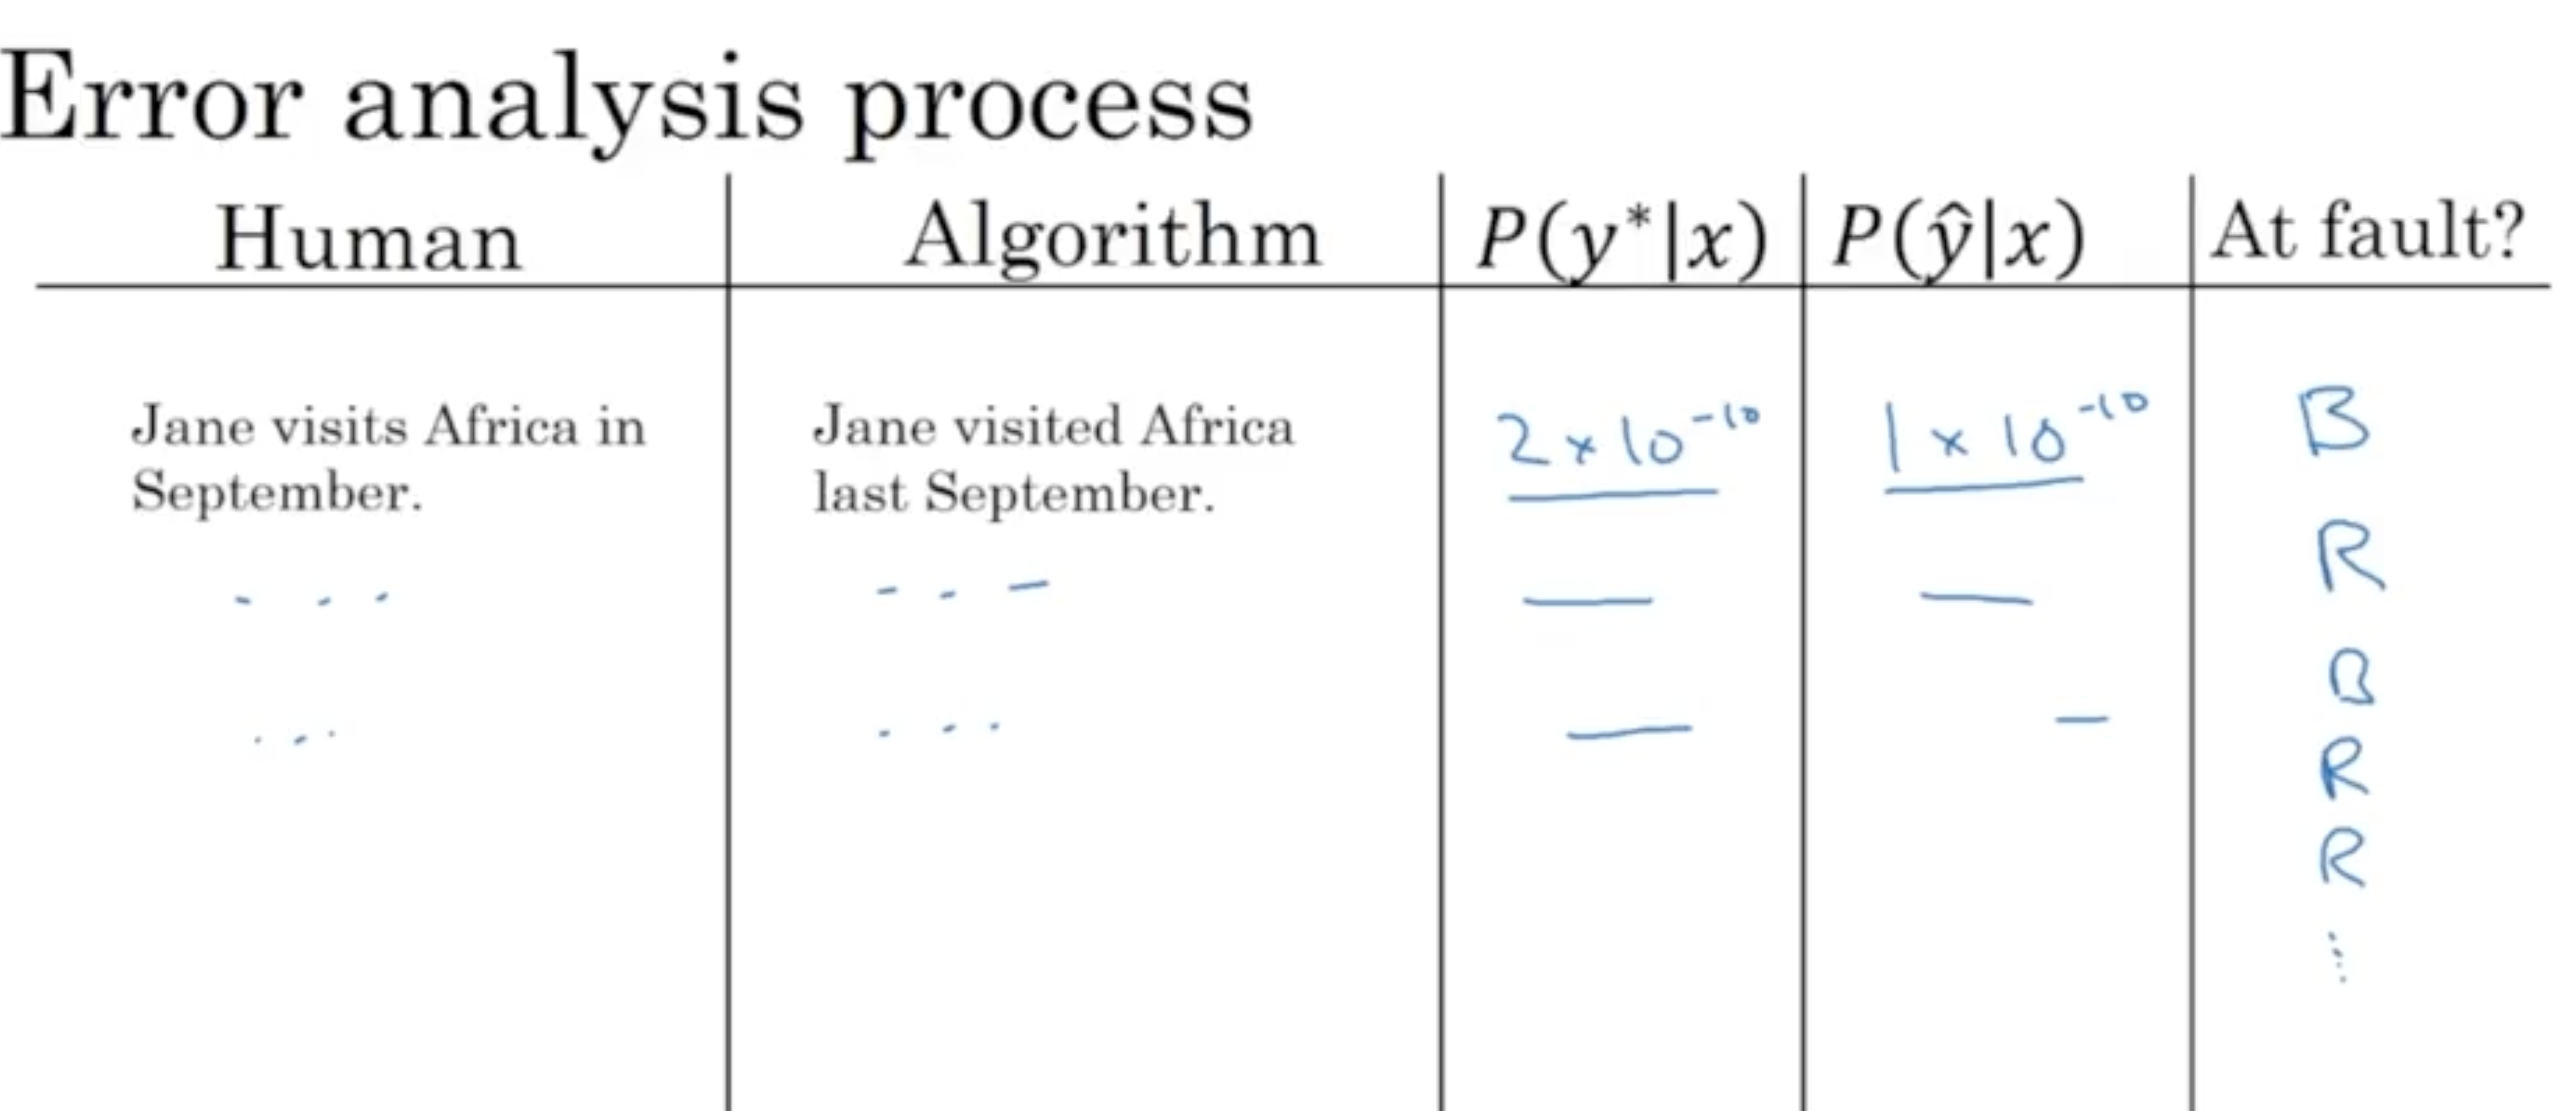






# Attention Model Intuition

* If you had to translate a book's paragraph from French to English, you would not read the whole paragraph, then close the book and translate. 
* Even during the translation process, you would read/re-read and focus on the parts of the French paragraph corresponding to the parts of the English you are writing down. 
* The attention mechanism tells a Neural Machine Translation model where it should pay attention to at any step. 


- A bidirectional RNN encoder processes the source sentence and generates contextual embeddings for each word.- We use another rnn to generate the english translation. 
- The decoder (also an RNN) generates the translation word by word.
- At each decoding step, attention assigns weights to each input word, indicating its relevance. For the first word translated, where should it look at?
- These weights are used to compute a context vector — a weighted sum of encoder outputs — which helps generate the next word.
- A new set of attention weights is calculated at every decoding step.


# Attention Model

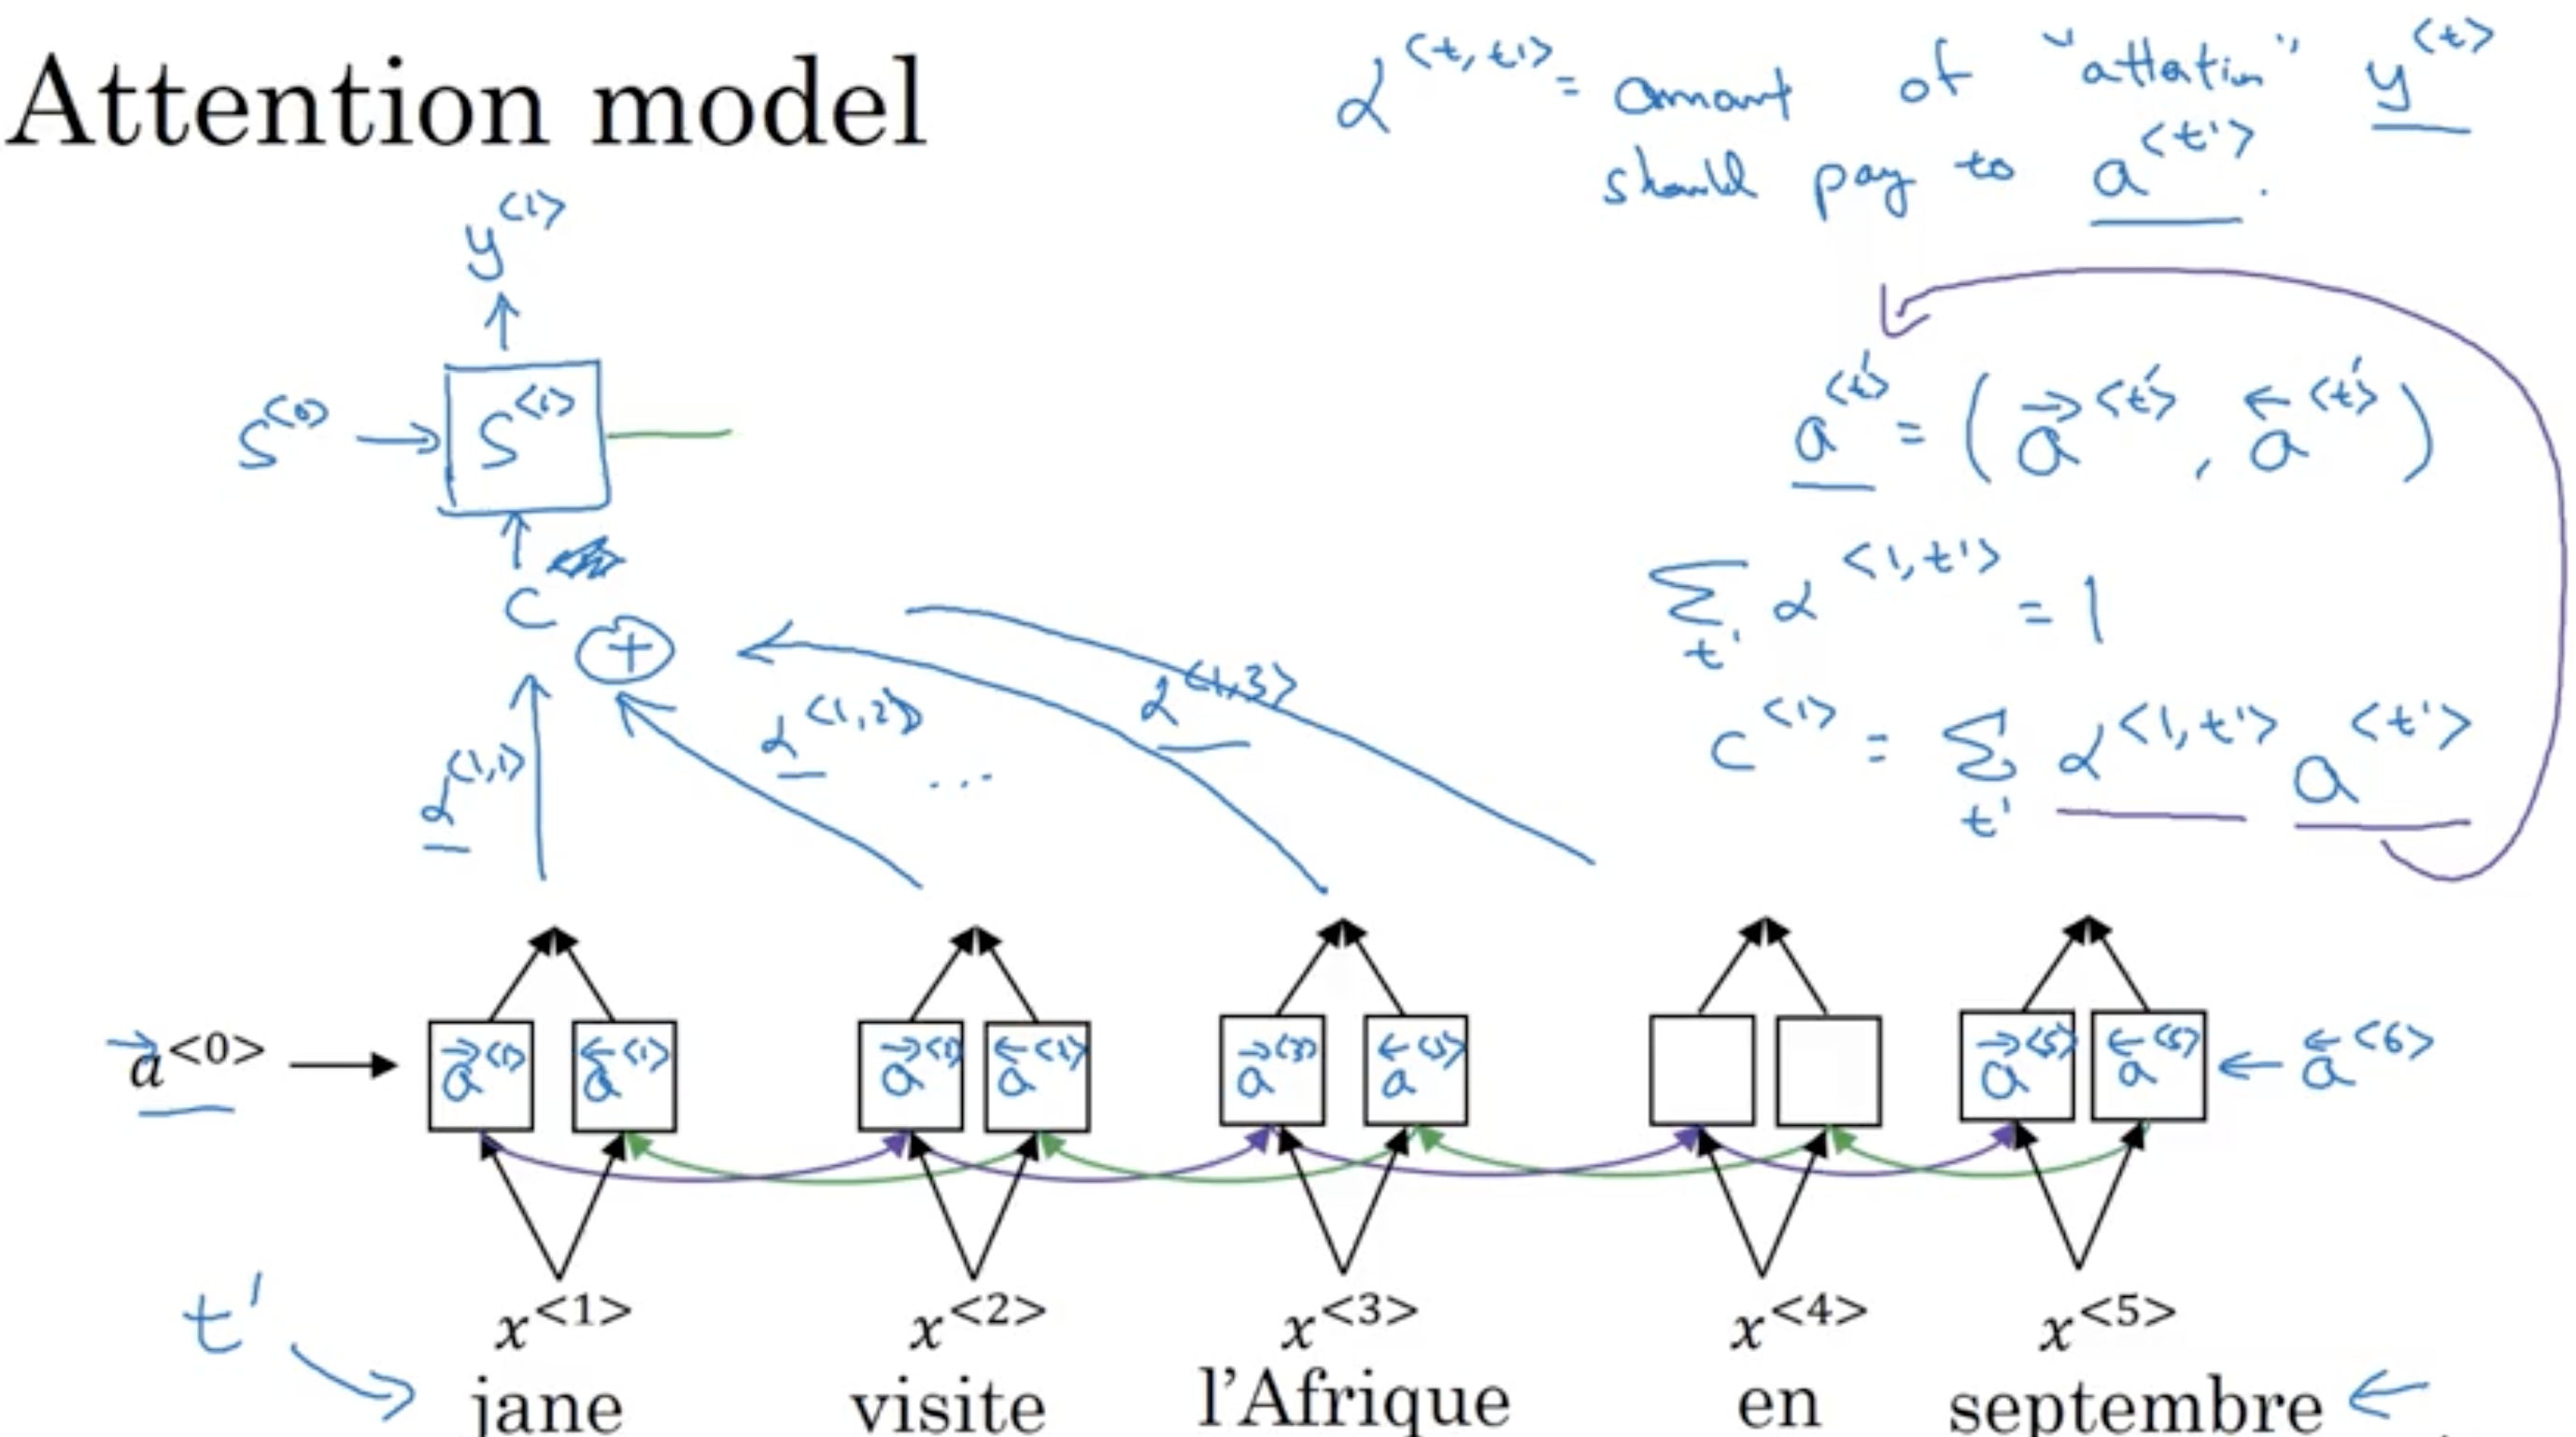

- How to compute the attention weights? alpha^t,t'

- Inputs:
    1. The decoder hidden state from the previous time step t-1
    2. The encoder hidden state at positio t' 

- We use the inputs in 1 hidden layer network to compute a score/energy e^t,t'. (we trust gradient descend to find a good combination of the inputs)

- Apply a softmax over all time steps to get normalized attention weights so weights sum to 1


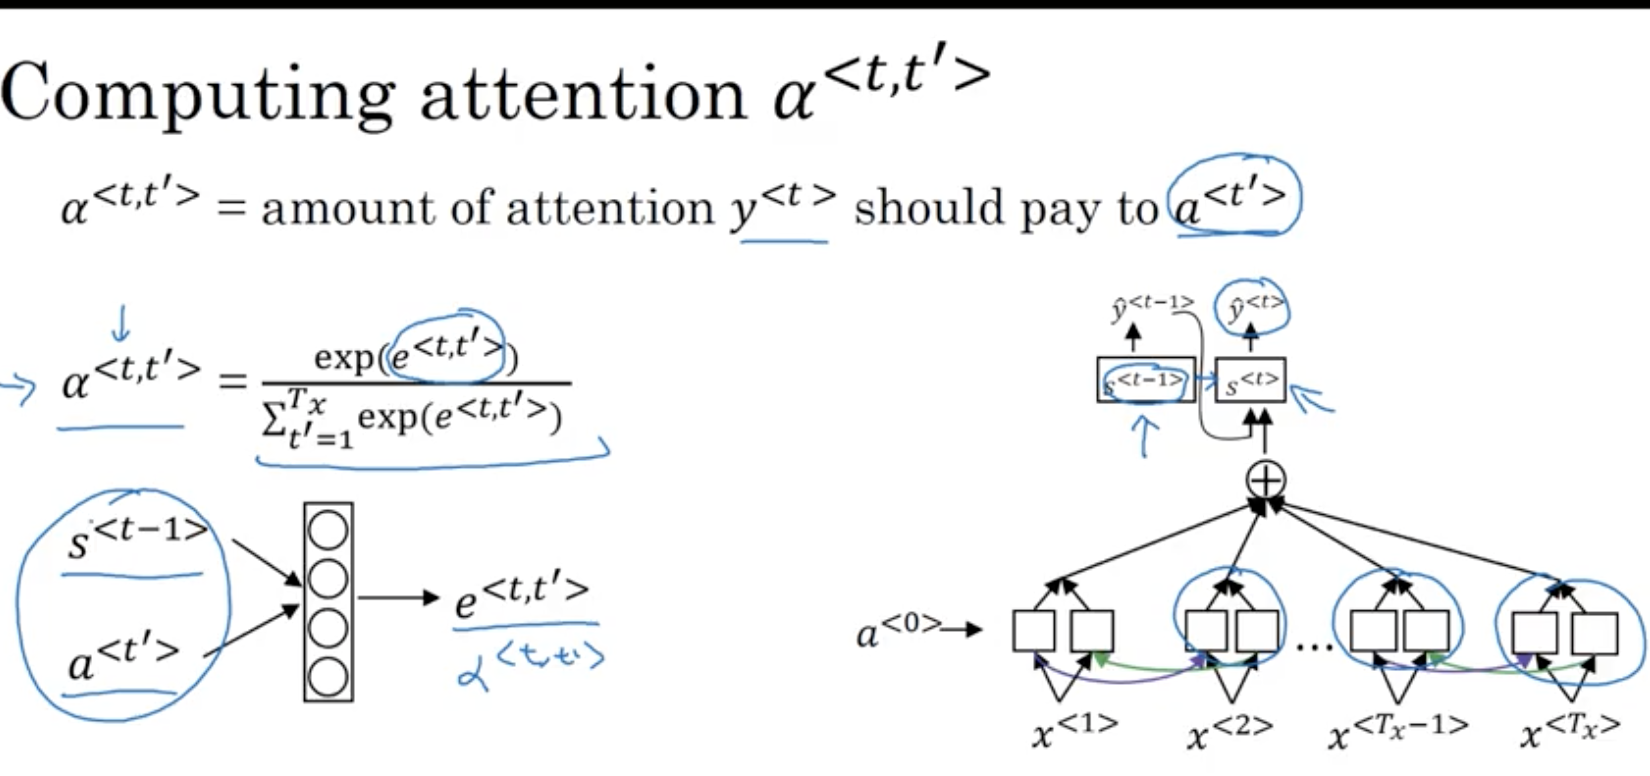


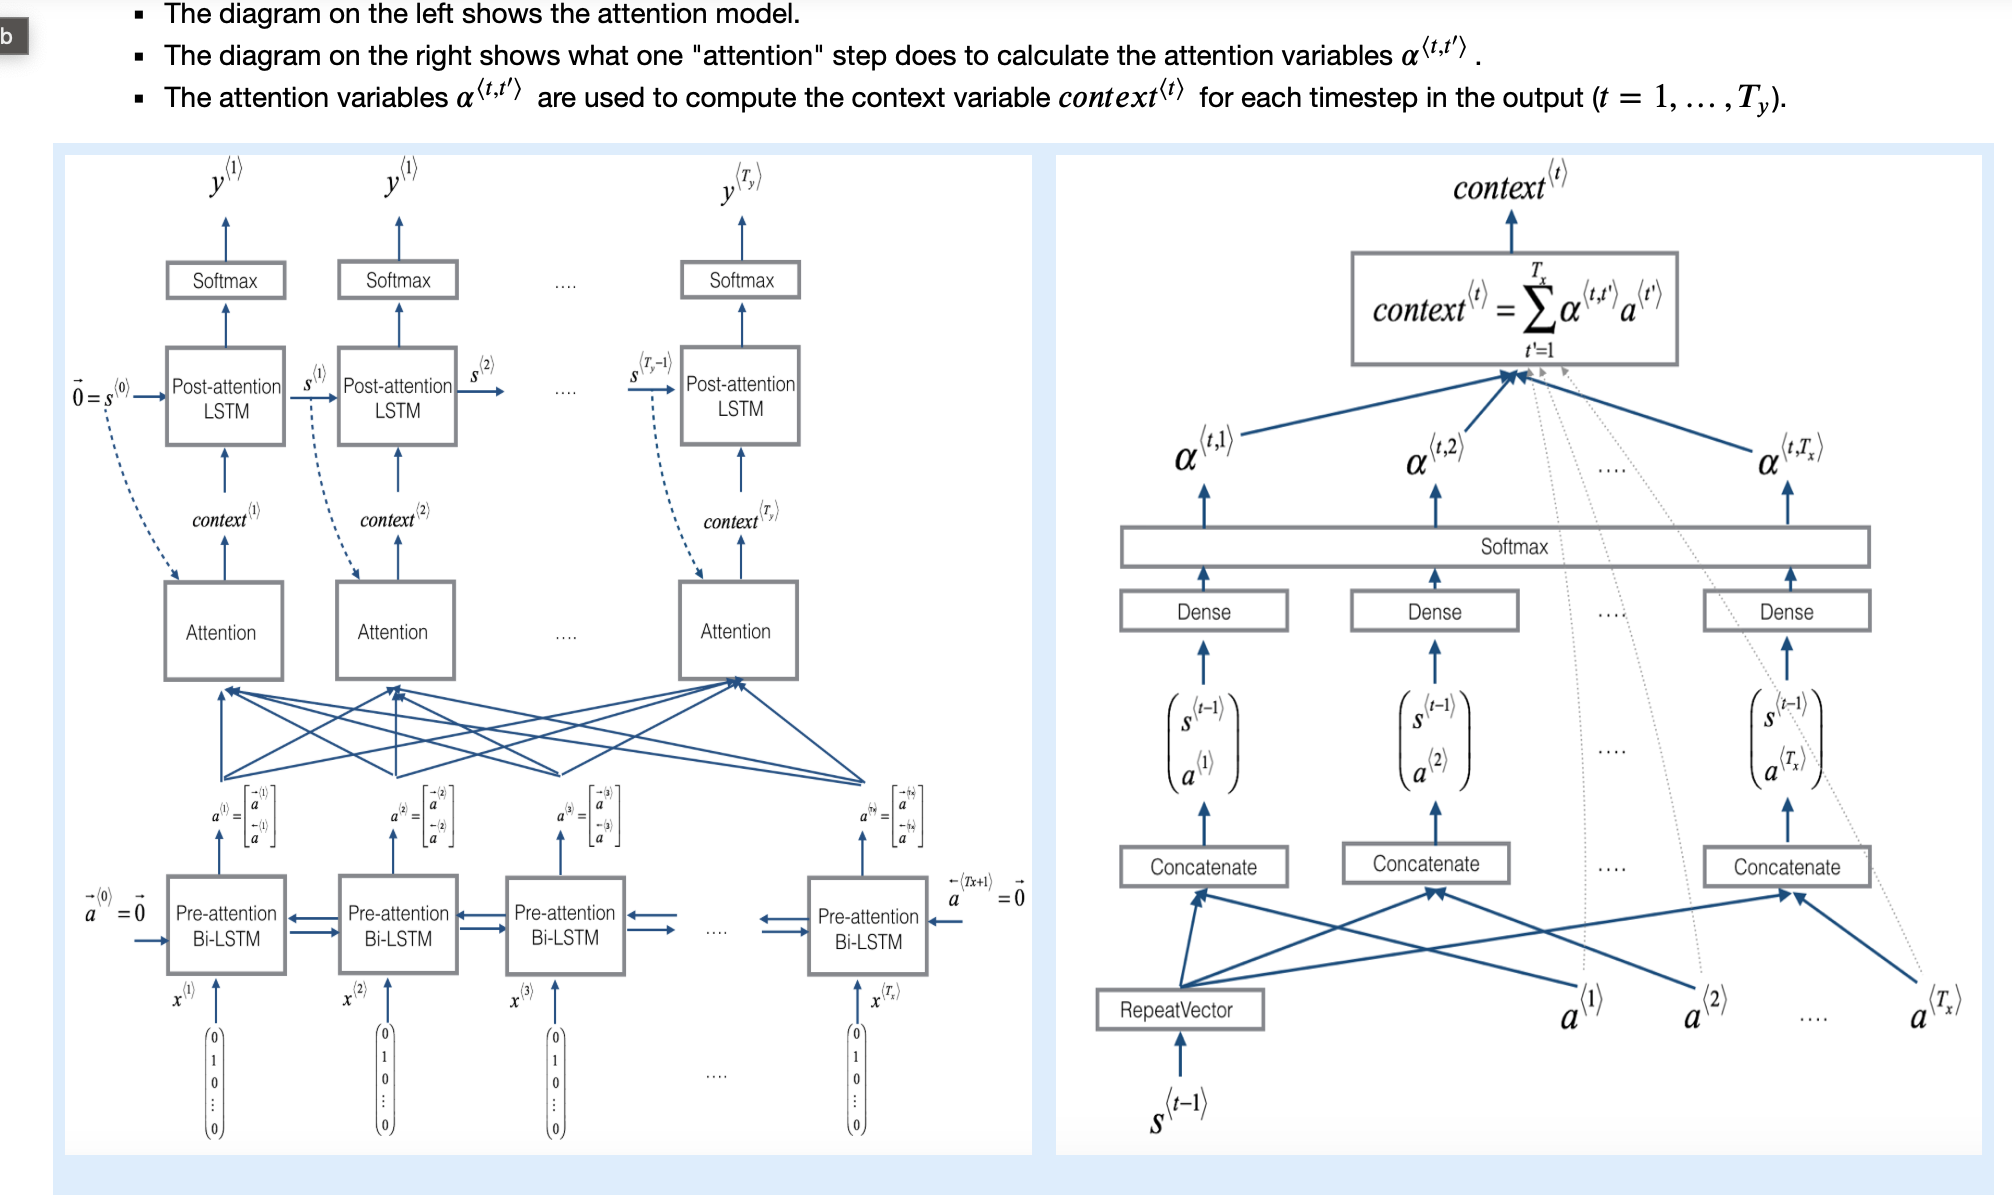




# Applications

### Speech recognition

Before, we used phonemes - hand written basic units of sound. like "the quick brown fox" as "de kwik braun"

Now we use end-to-end deep learning, input audio clip and output the transcript. Because we have enough data.

Two approaches:
    - attention-based , taking different time frames of the input, and attention tries to output of the transcript 
    - Connectionist temporal classification, used when the input and output lengths don’t match, and alignment is unknown. allows repeating labels and blanks, then collapses them into the final output. Example -h-ello-o -> hello


### Trigger word detection "Alexa" "Hey Siri" "Okay Google"

-Take the input, create spectogram features, and pass to the RNN.
- One approach is to label "1" the timestep where the trigger word ended:

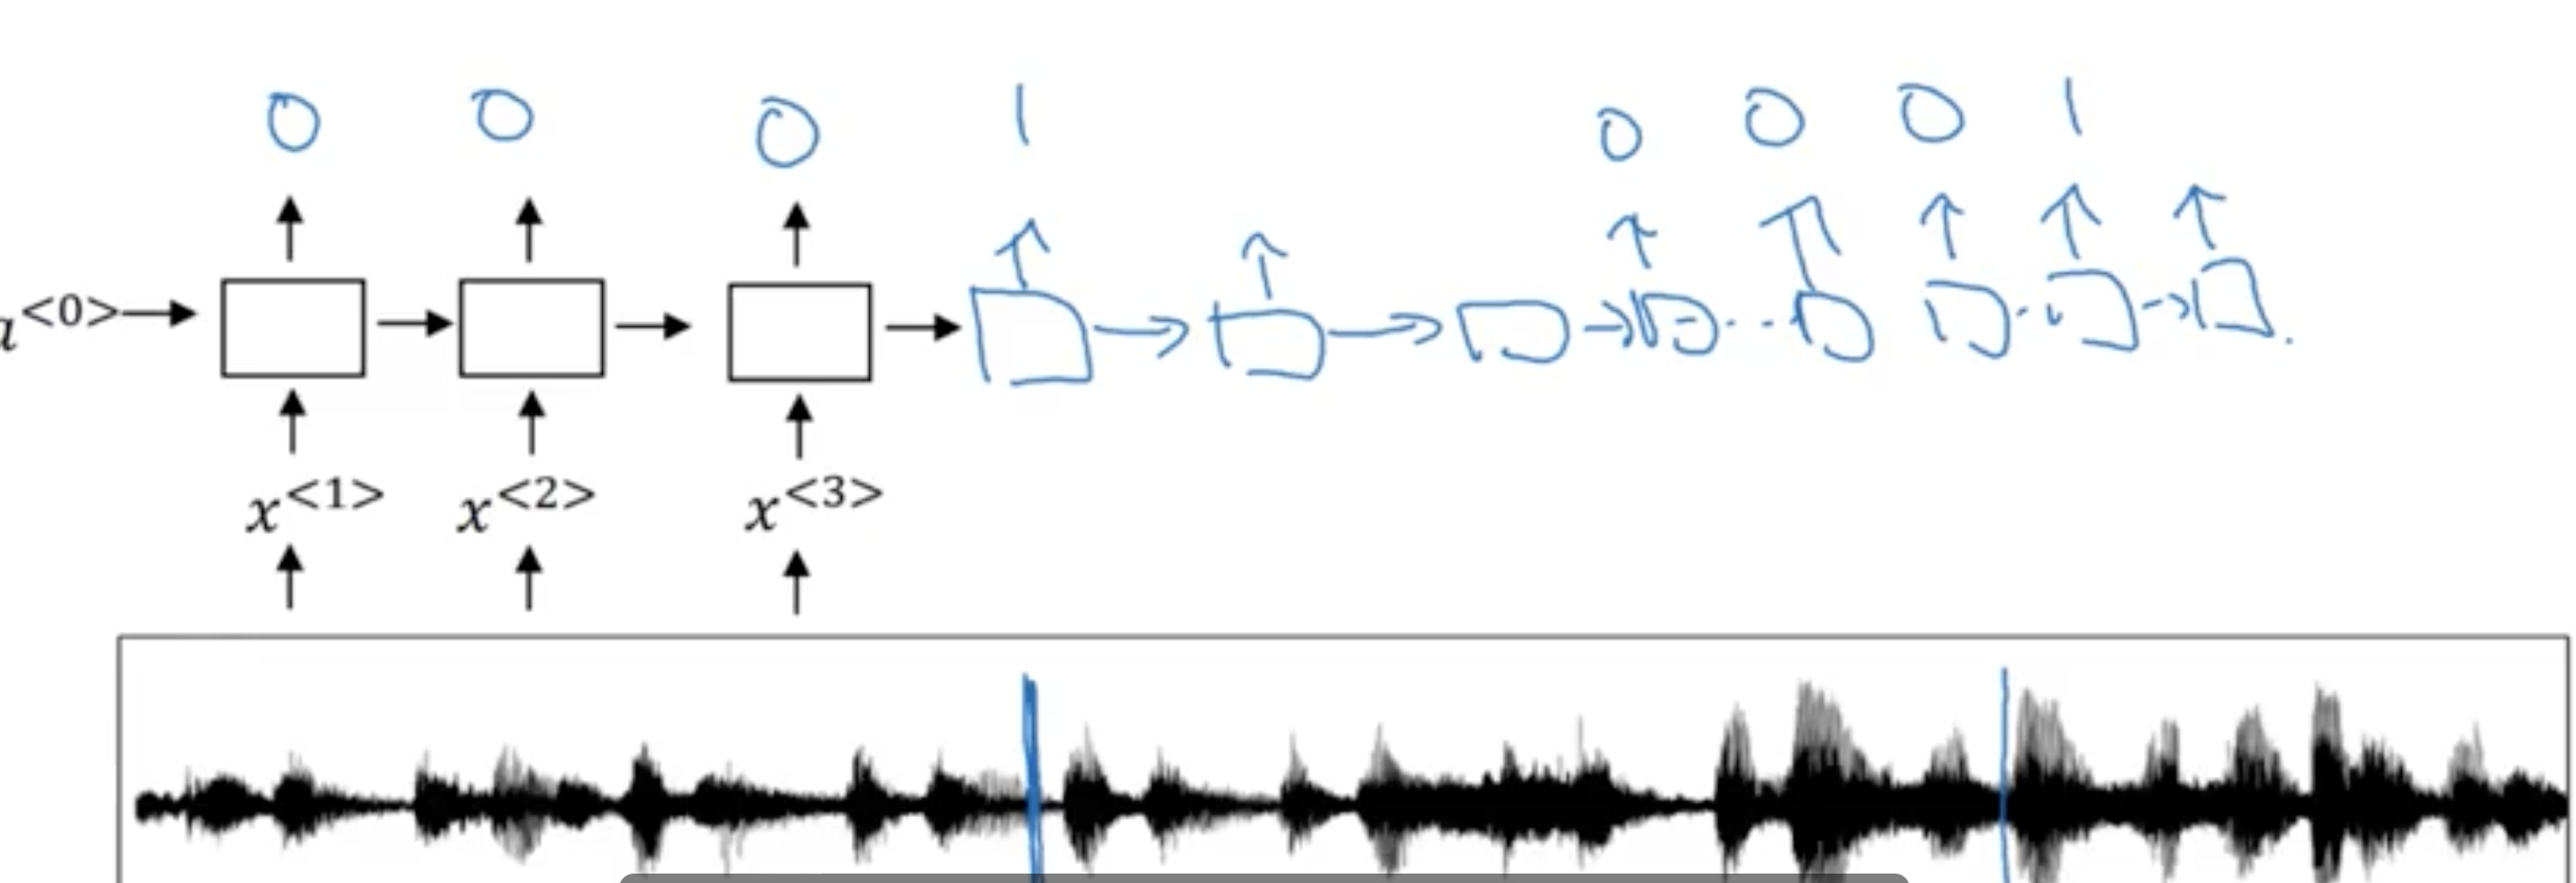

- But its pretty unbalanced, so a "hack" is to put multiple ones after the trigger word, not only one.
